In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import random
import math
import numpy as np

In [19]:
words = ["Gazelle", "Whale", "Mongoose", "Anteater", "Hawk", "Tortoise", "Fox", "Pigeon"]
f0 = np.array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
w0 = np.array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

f_list = [f0]
w_list = [w0]
activity_profile_map = {}
beta = 0.3

def rho():
    i = len(f_list)
    return math.sqrt(1 + beta**2 * ((f_list[i-1].dot(w_list[i]))**2 - 1)) - beta*(f_list[i-1].dot(w_list[i]))

def present(word):
    w = np.array([0] * len(words))
    w[words.index(word)] = 1
    w_list.append(w)
    f = f_list[len(f_list) - 1] * rho() + beta * w
    activity_profile_map[word] = f
    f_list.append(f)
    
def recall(word):
    w = activity_profile_map[word]
    w_list.append(w)
    f = f_list[len(f_list) - 1] * rho() + beta * w
    f_list.append(f)
    return f

for i in range(len(words)):
    present(words[i])

recall_list = ["Whale", "Gazelle","Hawk", "Fox", "Tortoise", "Pigeon"]
for i in range(len(recall_list)):
    f = recall(recall_list[i]) 
    print f
    
#    recall(word)
#graph somehow

[ 0.82841135  0.26052332  0.17875701  0.18738826  0.19643627  0.20592116
  0.21586403  0.22628699]
[ 0.91075243  0.19207275  0.13178993  0.13815339  0.1448241   0.15181691
  0.15914737  0.16683177]
[ 0.90087122  0.21572394  0.17631115  0.18482431  0.19374852  0.108758
  0.11400936  0.11951428]
[ 0.86813682  0.22484608  0.20018882  0.2098549   0.21998771  0.16336812
  0.17125632  0.08517977]
[ 0.85146959  0.233679    0.21982478  0.23043898  0.24156569  0.20563482
  0.12121823  0.06029173]
[ 0.82142911  0.23407034  0.22748861  0.23847286  0.24998748  0.22819715
  0.17209421  0.13289404]


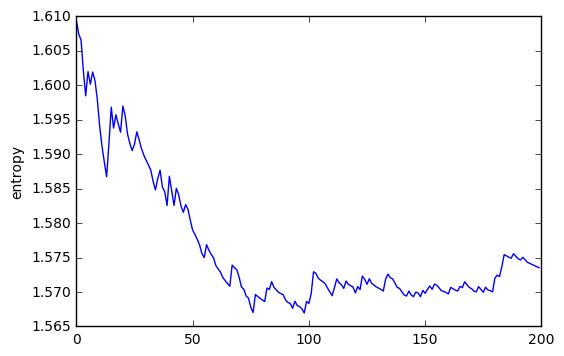

In [8]:
plt.plot(entropy_arr)
plt.ylabel('entropy')
plt.show()

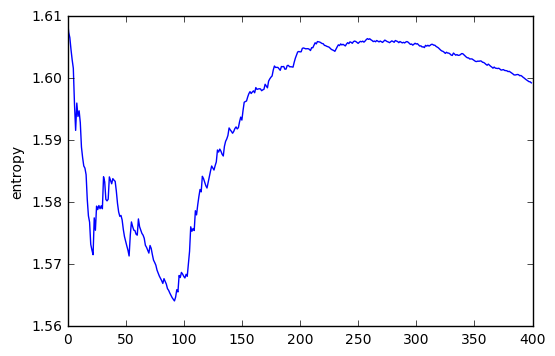

In [65]:
plt.plot(entropy_arr)
plt.ylabel('entropy')
plt.show()